In [218]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV ,KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [219]:
df = pd.read_csv('Data/colon-dataset-processed.csv')
df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [220]:
data=df.drop(['Class'],axis=1)
target=df['Class']

In [221]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state=15)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

adaboost = AdaBoostClassifier()
adaboost.fit(X_train_res, y_train_res)
y_pred= adaboost.predict(X_test)
print("Accuracy: %.2f%%" % (adaboost.score(X_test, y_test) * 100.0))

Accuracy: 82.86%


In [222]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       0.85      0.85      0.85        20
     healthy       0.80      0.80      0.80        15

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.83        35
weighted avg       0.83      0.83      0.83        35



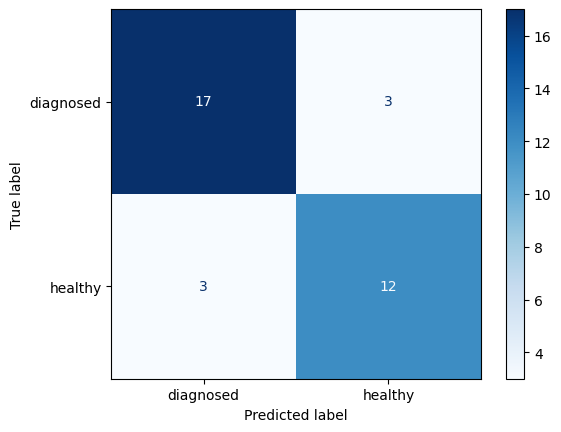

In [223]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [224]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred1 = grid_search.predict(X_test)
print("Accuracy: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'learning_rate': 0.001, 'n_estimators': 50}
Best cross-validation accuracy: 85.57% 
Accuracy: 85.71%


In [225]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

   diagnosed       0.86      0.90      0.88        20
     healthy       0.86      0.80      0.83        15

    accuracy                           0.86        35
   macro avg       0.86      0.85      0.85        35
weighted avg       0.86      0.86      0.86        35



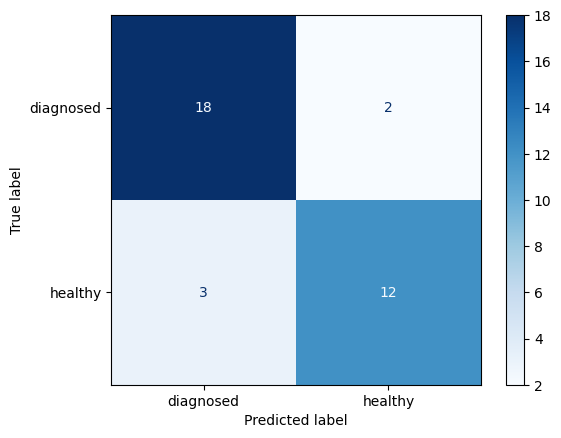

In [226]:
cm=confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()